## 1. Loading and Preparing Data
We will use the Airline dataset and prepare it for modeling.

In [39]:
from sktime.datasets import load_airline
import pandas as pd

y = load_airline()
y.head()

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

## 2. Train-Test Splitting Strategies
We will explore temporal splits, expanding and sliding windows.

In [40]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y, test_size=12)
print(y_train.shape, y_test.shape)

(132,) (12,)


In [41]:
from sktime.forecasting.model_selection import SlidingWindowSplitter, ExpandingWindowSplitter

splitter_slide = SlidingWindowSplitter(window_length=36, step_length=12, fh=12)
splitter_expand = ExpandingWindowSplitter(initial_window=36, step_length=12, fh=12)

print('Sliding Window Splits')
for train, test in splitter_slide.split(y):
    print('Train:', train, 'Test:', test)

print('Expanding Window Splits')
for train, test in splitter_expand.split(y):
    print('Train:', train, 'Test:', test)

Sliding Window Splits
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35] Test: [47]
Train: [12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35
 36 37 38 39 40 41 42 43 44 45 46 47] Test: [59]
Train: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59] Test: [71]
Train: [36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71] Test: [83]
Train: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83] Test: [95]
Train: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89 90 91 92 93 94 95] Test: [107]
Train: [ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107] Test: [119]
Train: [ 84  85  86  87  88  89  90  

## 3. Benchmark Forecasting Models
We will train naive and exponential smoothing models.

In [42]:
from sktime.forecasting.naive import NaiveForecaster

fh = list(range(1,13))
naive = NaiveForecaster(strategy='last')
naive.fit(y_train)
y_pred_naive = naive.predict(fh)
y_pred_naive

/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)


1960-01    405.0
1960-02    405.0
1960-03    405.0
1960-04    405.0
1960-05    405.0
1960-06    405.0
1960-07    405.0
1960-08    405.0
1960-09    405.0
1960-10    405.0
1960-11    405.0
1960-12    405.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [43]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

ses = ExponentialSmoothing(trend=None, seasonal=None)
ses.fit(y_train)
y_pred_ses = ses.predict(fh)
y_pred_ses

/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is dep

1960-01    404.786132
1960-02    404.786132
1960-03    404.786132
1960-04    404.786132
1960-05    404.786132
1960-06    404.786132
1960-07    404.786132
1960-08    404.786132
1960-09    404.786132
1960-10    404.786132
1960-11    404.786132
1960-12    404.786132
Freq: M, Name: Number of airline passengers, dtype: float64

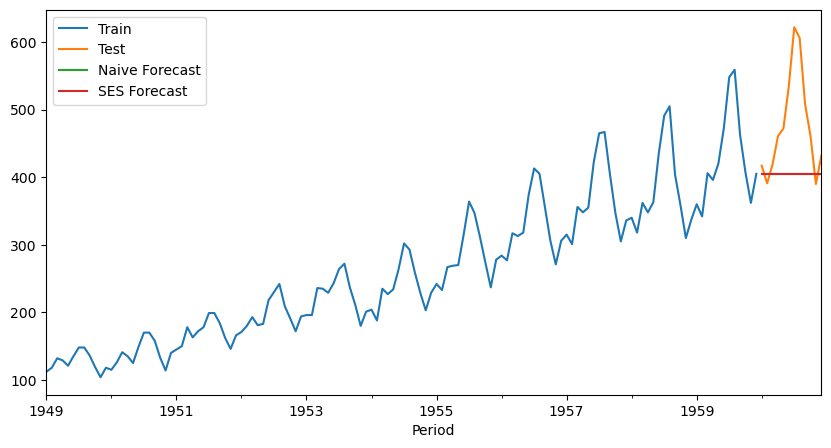

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
y_train.plot(label='Train')
y_test.plot(label='Test')
y_pred_naive.plot(label='Naive Forecast')
y_pred_ses.plot(label='SES Forecast')
plt.legend();

## 4. Evaluation
We will compute error metrics.

In [45]:
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_absolute_percentage_error

mae_naive = mean_absolute_error(y_test, y_pred_naive)
mape_naive = mean_absolute_percentage_error(y_test, y_pred_naive)
mae_ses = mean_absolute_error(y_test, y_pred_ses)
mape_ses = mean_absolute_percentage_error(y_test, y_pred_ses)
print('Naive MAE:', mae_naive, 'MAPE:', mape_naive)
print('SES MAE:', mae_ses, 'MAPE:', mape_ses)

Naive MAE: 76.0 MAPE: 0.14251338486772208
SES MAE: 76.14257862669035 MAPE: 0.14279017396066332


## 5. Grid Search as Ensemble
We will tune parameters using GridSearchCV and discuss overfitting.

In [46]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV

param_grid = {'sp': [6, 12], 'trend': ['add', None], 'seasonal': ['add', None]}
gs = ForecastingGridSearchCV(forecaster=ExponentialSmoothing(), param_grid=param_grid, cv=splitter_expand)
gs.fit(y_train)
print('Best params:', gs.best_params_)

/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is dep

Best params: {'seasonal': 'add', 'sp': 6, 'trend': 'add'}


In [47]:
y_pred_best = gs.predict(fh)
y_pred_best

/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is dep

1960-01    425.898554
1960-02    422.156546
1960-03    416.672735
1960-04    394.720610
1960-05    381.479630
1960-06    415.688792
1960-07    436.729338
1960-08    432.987329
1960-09    427.503518
1960-10    405.551393
1960-11    392.310414
1960-12    426.519575
Freq: M, Name: Number of airline passengers, dtype: float64

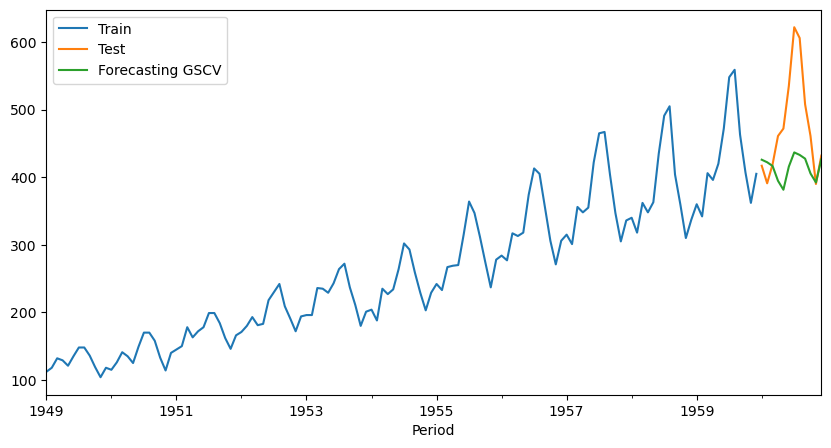

In [48]:
plt.figure(figsize=(10,5))
y_train.plot(label='Train')
y_test.plot(label='Test')
y_pred_best.plot(label='Forecasting GSCV')
plt.legend()

In [49]:
from sktime.forecasting.model_selection import ForecastingGridSearchCV

param_grid = {'sp': [6, 12], 'trend': ['add', None], 'seasonal': ['add', None]}
gs = ForecastingGridSearchCV(forecaster=ExponentialSmoothing(), param_grid=param_grid, cv=splitter_slide)
gs.fit(y_train)
print('Best params:', gs.best_params_)


/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is dep

Best params: {'seasonal': None, 'sp': 6, 'trend': 'add'}


/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is dep

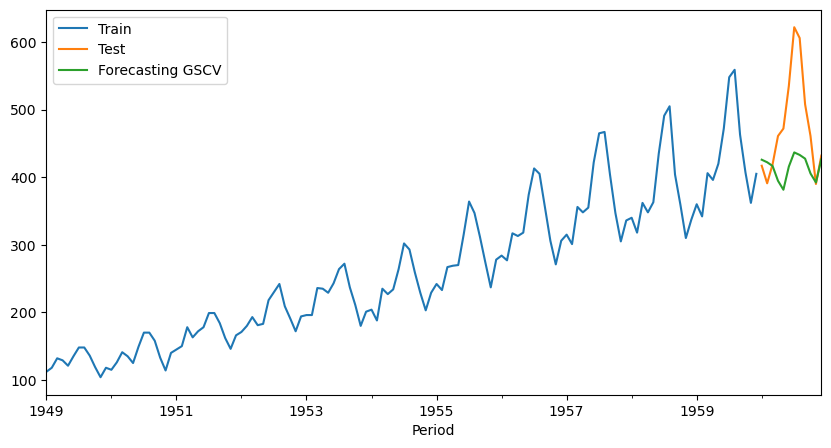

In [50]:
plt.figure(figsize=(10,5))
y_train.plot(label='Train')
y_test.plot(label='Test')
y_pred_best.plot(label='Forecasting GSCV')
plt.legend()

In [54]:
from sktime.forecasting.sarimax import SARIMAX

forecaster = SARIMAX(order=(1, 0, 0), trend="t", seasonal_order=(1, 0, 0, 12),)
forecaster.fit(y_train)  
y_pred_sarima = forecaster.predict(fh=y_test.index)  

/home/dominik/miniforge3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:400: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/utils/datetime.py:73: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = pd.tseries.frequencies.to_offset(freq)
/home/dominik/miniforge3/lib/python3.12/site-packages/sktime/forecasting/base

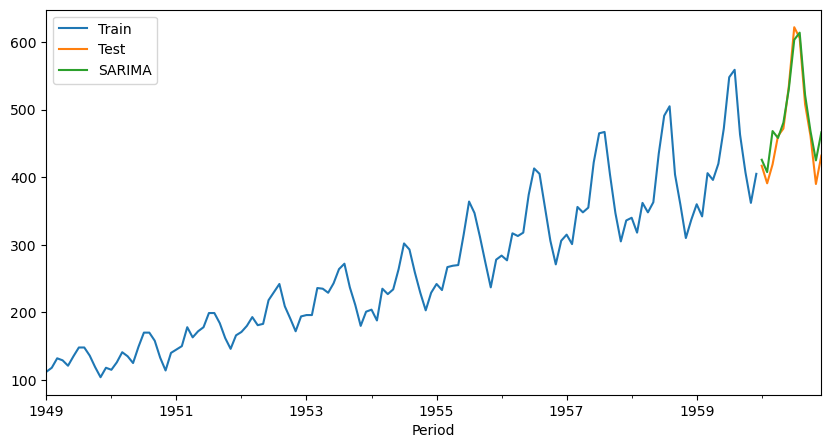

Exception ignored in: <function ResourceTracker.__del__ at 0x7ce7ac3060c0>
Traceback (most recent call last):
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x72b558f3a0c0>
Traceback (most recent call last):
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 77, in __del__
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 86, in _stop
  File "/home/dominik/miniforge3/lib/python3.12/multiprocessing/resource_tracker.py", line 111, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function Resour

In [55]:
plt.figure(figsize=(10,5))
y_train.plot(label='Train')
y_test.plot(label='Test')
y_pred_sarima.plot(label='SARIMA')
plt.legend()